# Data exploration with data visualization 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./data/train.csv')

### Visualize the distribution of target "SalePrice"

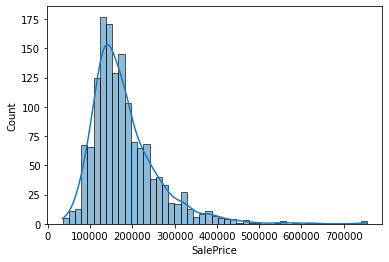

In [9]:
_ = sns.histplot(df['SalePrice'], kde=True)

 ### Distribution of Data Attributes

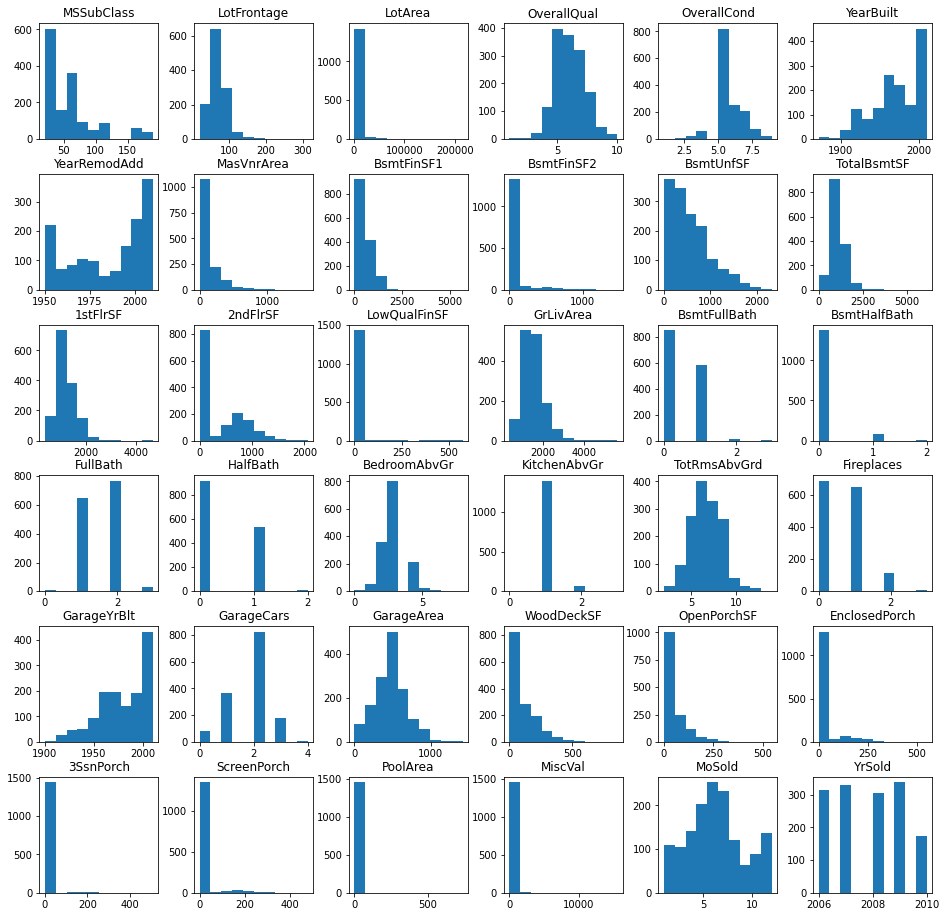

In [14]:
features = df.iloc[:, 1:-1]
_ = features.hist(figsize=(16,16), grid=False)

### Overview of data relationships with correlation matrix

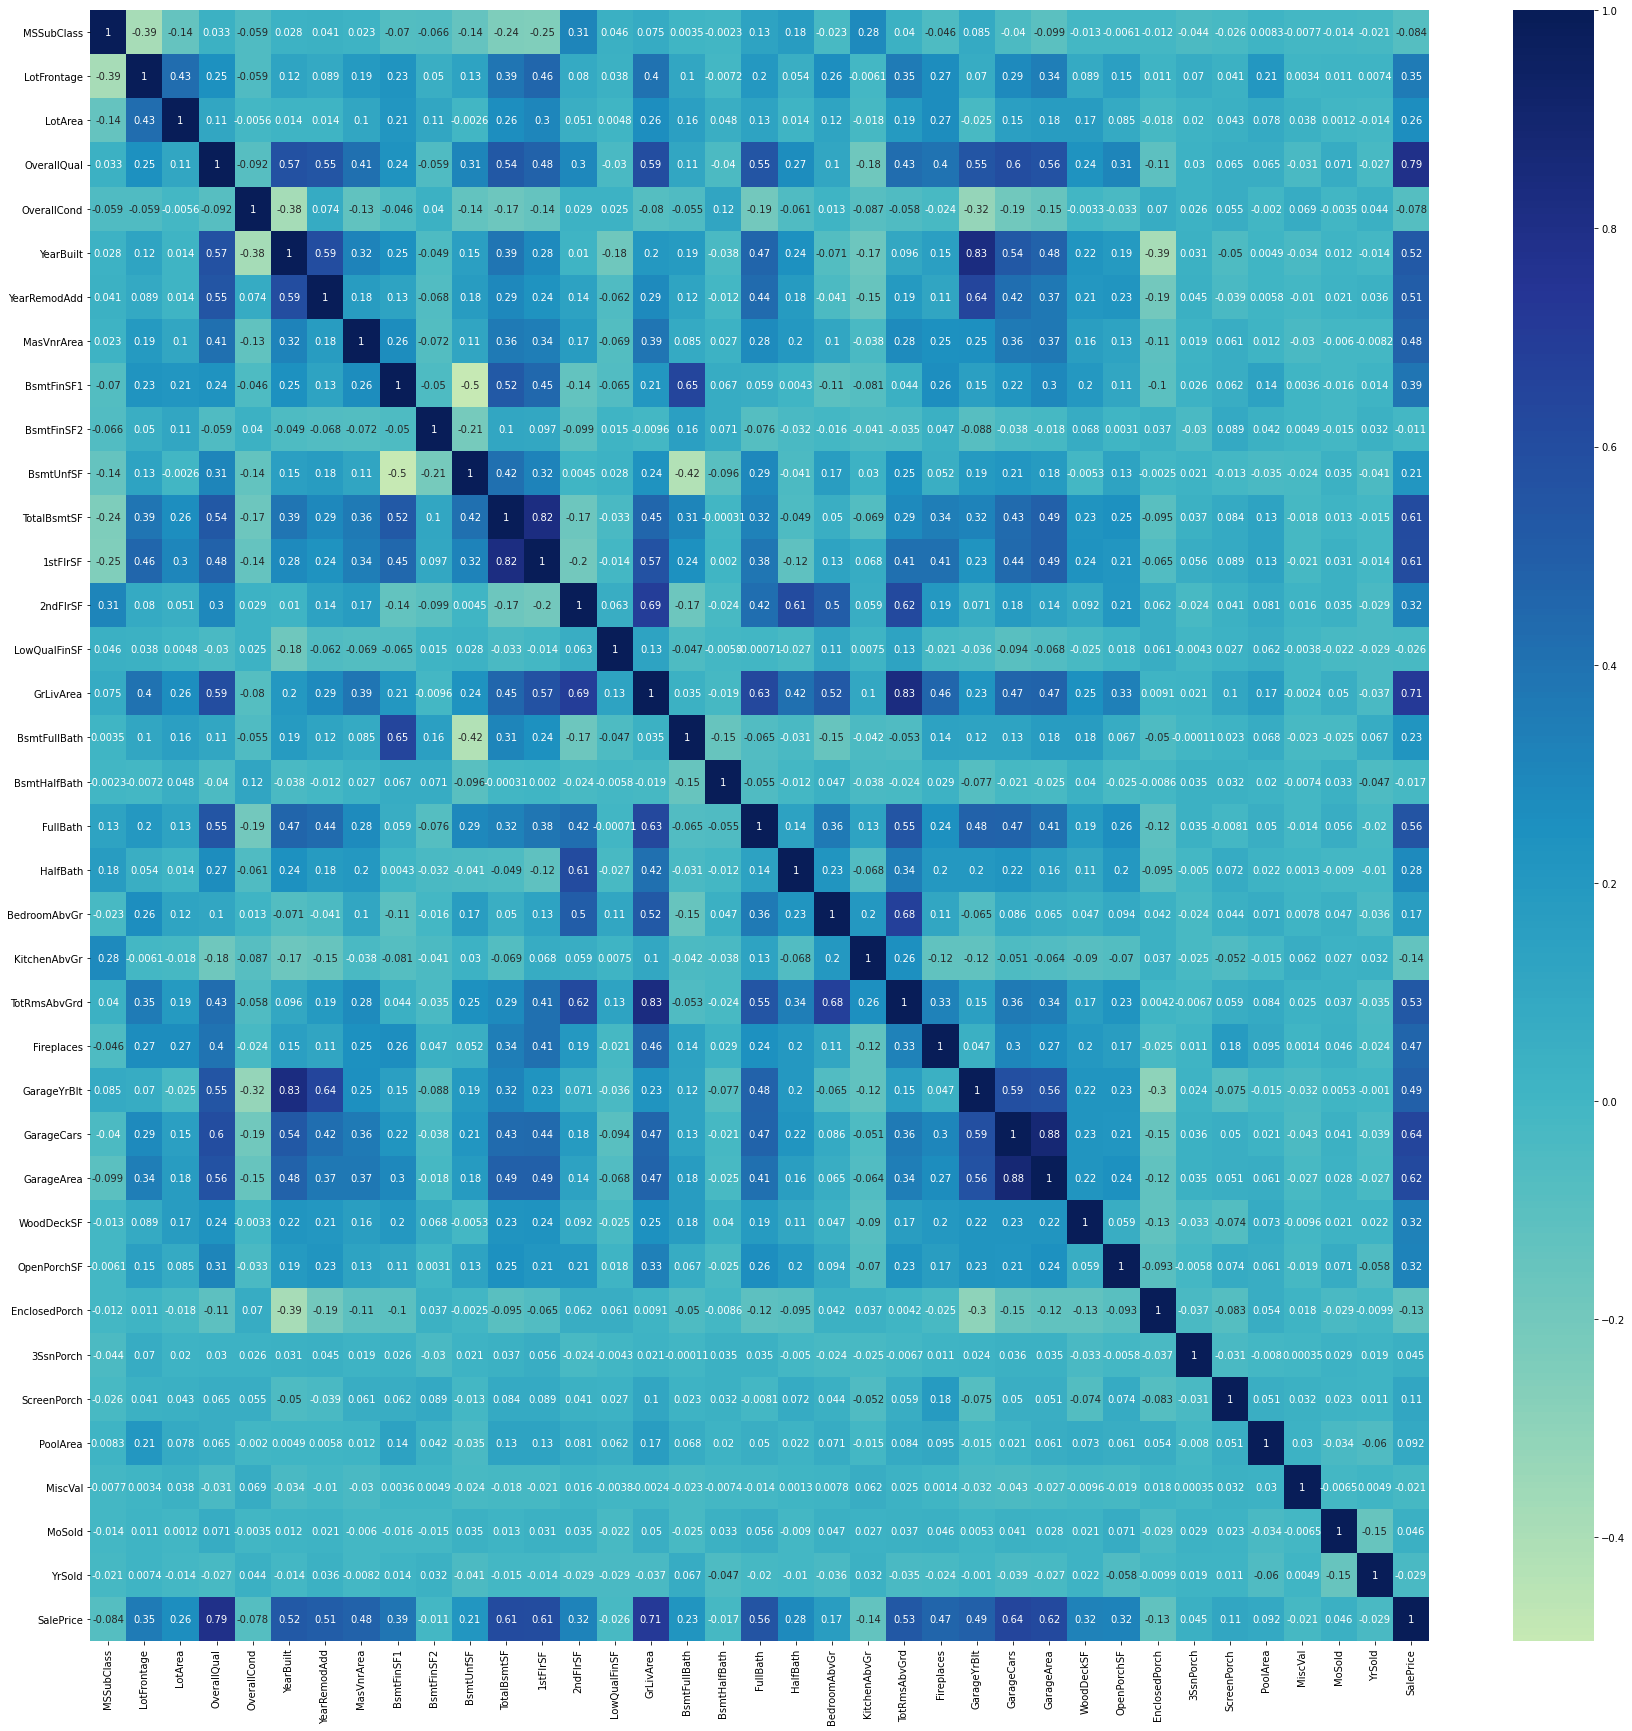

In [21]:
attr_df= df.iloc[:, 1:]
corrmat = attr_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corrmat, center=0, annot=True, cmap='YlGnBu')
plt.show()

### Zoom in the correlation matrix to get the top 10 attributes related to the target

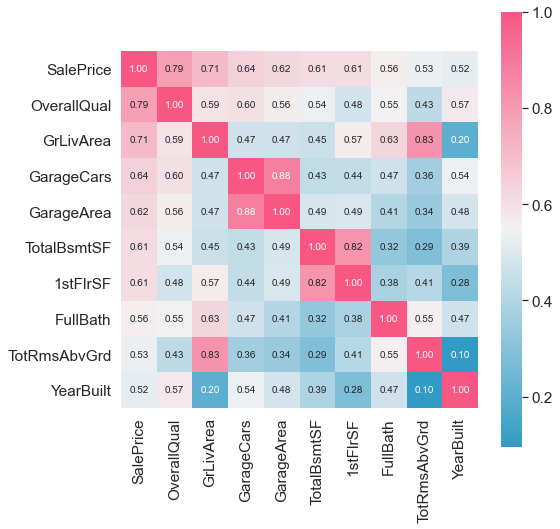

In [32]:
corrmat = df.corr()
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(rc={'figure.figsize':(8, 8)}, font_scale=1.4)
cmap = sns.diverging_palette(230, 0, 90, 60, as_cmap=True)
_ = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap = cmap, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

From the correlation matrix we could tell that
>* "OverallQual", "GrLivArea" and "TotalBsmtSF" is highly correlated with "SalePrice" 
>* There's a strong correlation between "GarageCars" and "GarageArea," "TotalBsmtSF" and "1stFlrSF,"  and "GrLivArea" and "TotRmsAbvGrd". Thus, we only need one of the variables in our later analysis.

### Scatter plots between strongly correlated attributes

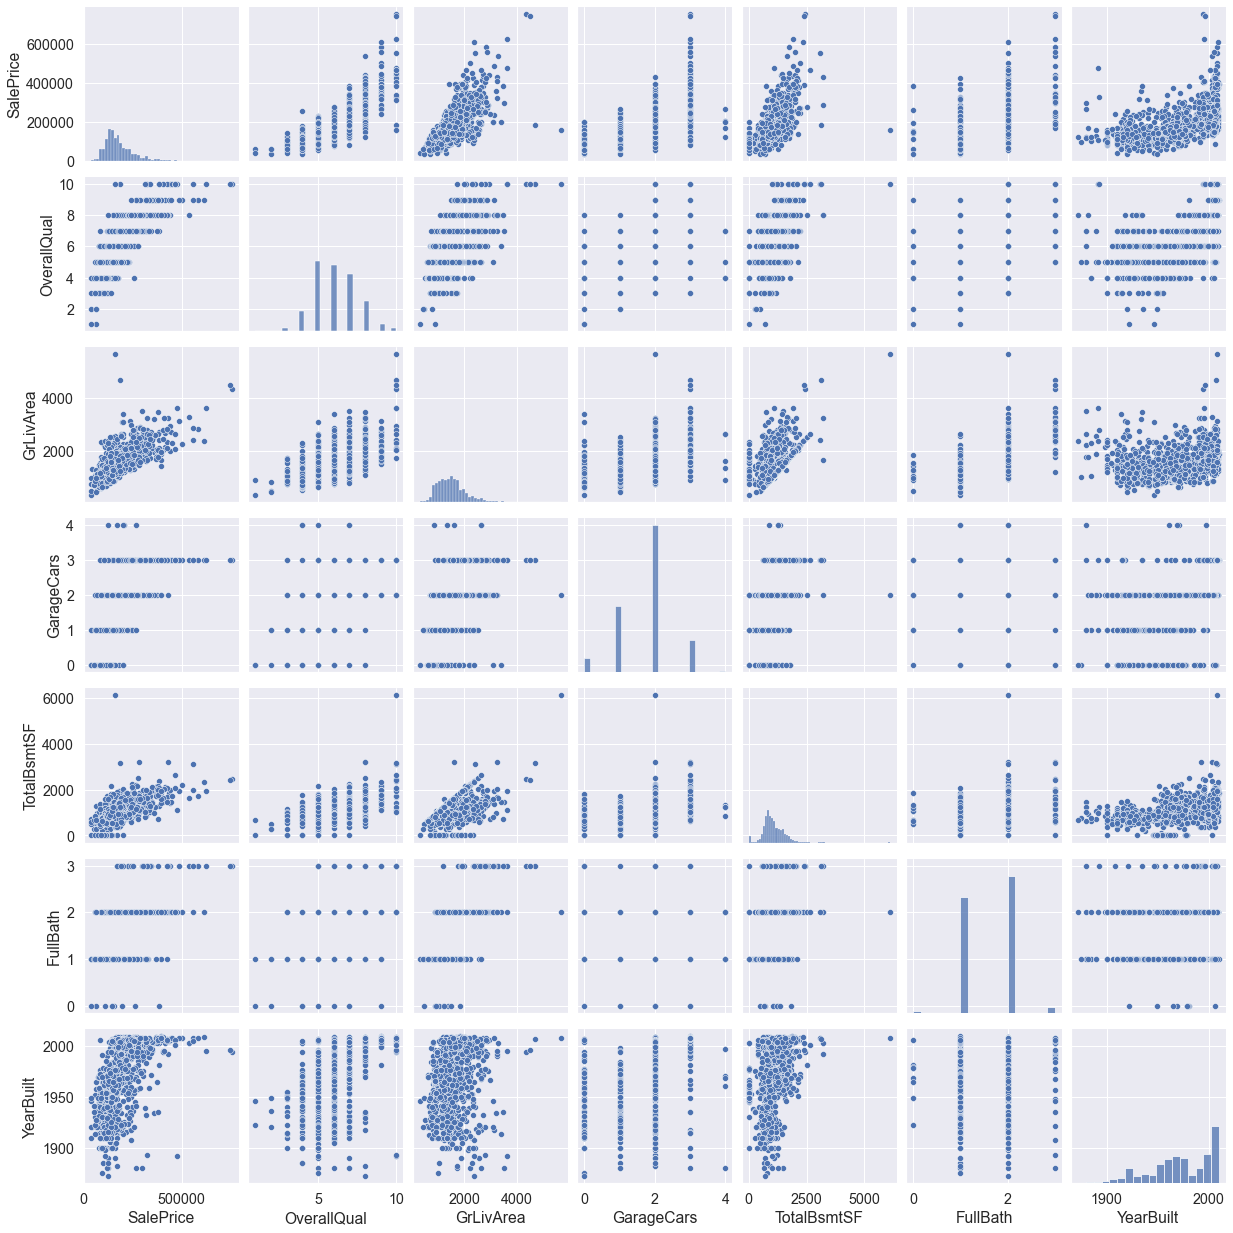

In [29]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
_ = sns.pairplot(df[cols])

 ### Distribution of data attributes after preprocessing

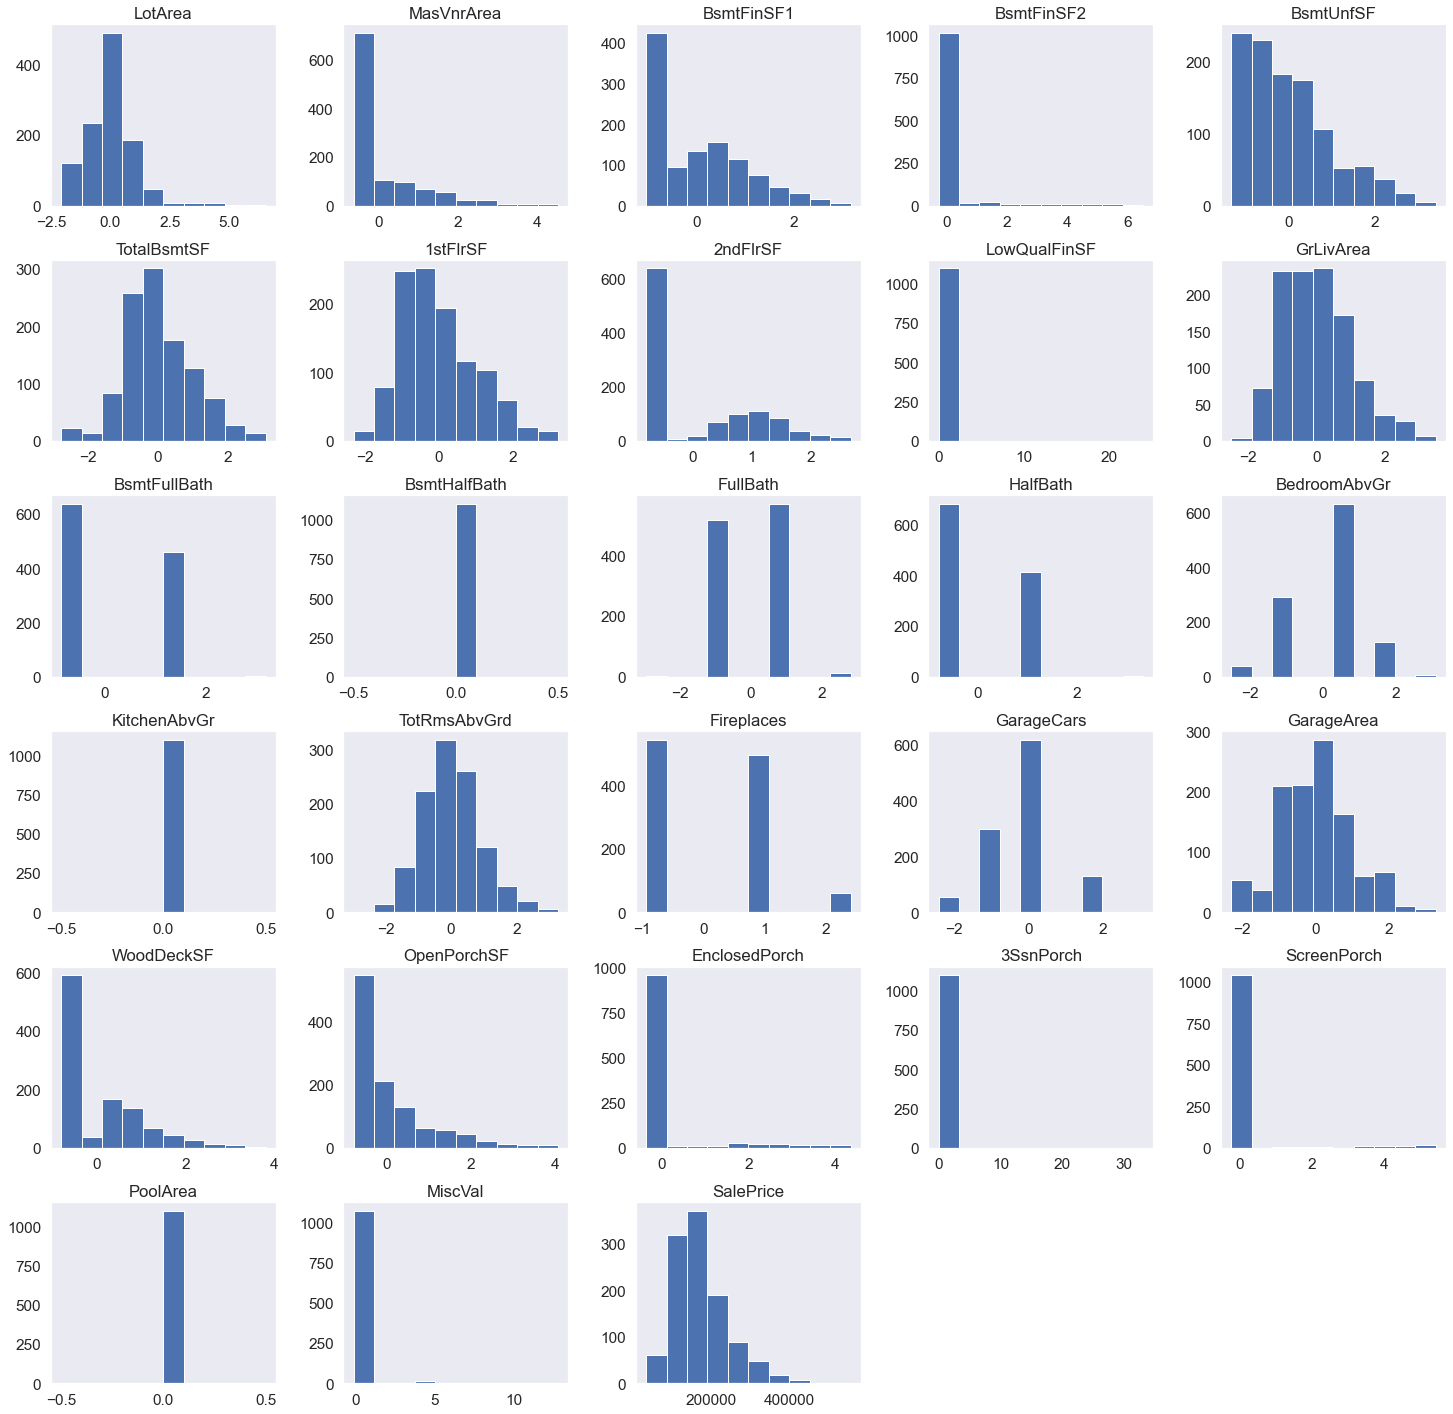

In [46]:
df_prepocess= pd.read_csv('./data/df_final.csv')
features_prepocess = df_prepocess.iloc[:, 390:]
_ = features_prepocess.hist(figsize=(25,25), grid=False)